### 1

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def fdjac(f, x_0, y_0=None):
    """4-6
    fdjac(f, x_0 [y_0])

    Compute a finite-difference approximation of the Jacobian matrix for
    `f` at `x_0`, where `y_0`=`f(x_0)` may be given.
    """
    if y_0 is None:
        y_0 = f(x_0)
    # FD step size
    delta = np.sqrt(np.finfo(float).eps) * max(np.linalg.norm(x_0), 1)
    m, n = len(y_0), len(x_0)
    if n == 1:
        J = (f(x_0 + delta) - y_0) / delta
    else:
        J = np.zeros((m, n))
        x = x_0.copy()
        for j in range(n):
            x[j] += delta
            J[:, j] = (f(x) - y_0) / delta
            x[j] -= delta
    return J


def levenberg(f, x_0, maxiter=40, ftol=1e-12, xtol=1e-12):
    """4-6
    levenberg(f, x_0 [maxiter, ftol, xtol])

    Use Levenberg's quasi-Newton iteration to find a root of the system
    `f` starting from `x_0`. Returns the history of root estimates 
    as a vector of vectors.

    The optional keyword parameters set the maximum number of iterations
    and the stopping tolerance for values of `f` and changes in `x`.

    """
    x = [np.array(x_0, dtype=float)]
    y_k = f(x_0)
    k = 0
    s = np.inf
    A = fdjac(f, x[k], y_k)  # start with FD Jacobian
    jac_is_new = True

    lam = 10
    while (np.linalg.norm(s) > xtol) and (np.linalg.norm(y_k) > ftol):
        # Compute the proposed step.
        B = A.T @ A + lam * np.eye(len(A[0]))
        z = A.T @ y_k
        s = - np.linalg.solve(B, z)

        x_hat = x[k] + s
        y_hat = f(x_hat)

        # Do we accept the result?
        if np.linalg.norm(y_hat) < np.linalg.norm(y_k):  # accept
            lam = lam / 10  # get closer to Newton
            # Broyden update of the Jacobian.
            s = s.reshape(-1, 1)
            A += (y_hat.reshape(-1, 1) - y_k.reshape(-1, 1) - A @ s) @ (s.T / (s.T @ s))
            jac_is_new = False

            x.append(x_hat)
            y_k = y_hat
            k += 1
        else:  # don't accept
            # Get closer to gradient descent.
            lam = 4 * lam
            # Re-initialize the Jacobian if it's out of date.
            if not jac_is_new:
                A = fdjac(f, x[k], y_k)
                jac_is_new = True

        if k == maxiter:
            print("Warning: Maximum number of iterations reached.")
            break
    return x

In [2]:
def f(x):
    u, v = x
    return np.array(
        [u * np.log(u) + v * np.log(v) + 0.3, u**4 + v**2 - 1]
    )

x_0 = np.array([1, 0.1])
x_seq = levenberg(f, x_0)

print(f"intersection of curves at {x_seq[-1]}")

intersection of curves at [0.9935067  0.16037863]


In [3]:
# check the intersection
f(x_seq[-1])

array([ 5.55111512e-17, -1.11022302e-16])

In [4]:
# for another initial point
x_0 = np.array([0.1, 1])
x_seq = levenberg(f, x_0)

print(f"intersection of curves at {x_seq[-1]}")

intersection of curves at [0.16790519 0.99960252]


In [5]:
# check the intersection
f(x_seq[-1])

array([-8.27116153e-15, -3.33066907e-16])

### 2

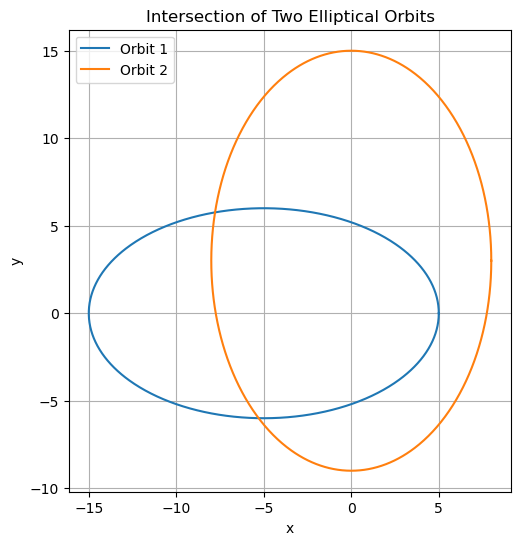

In [6]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 2*np.pi, 1000)

# the first elliptical orbit
x_1 = -5 + 10 * np.cos(t)
y_1 = 6 * np.sin(t)

# the second elliptical orbit
x_2 = 8 * np.cos(t)
y_2 = 3 + 12 * np.sin(t)

plt.figure(figsize=(8, 6))
plt.plot(x_1, y_1, label="Orbit 1")
plt.plot(x_2, y_2, label="Orbit 2")
plt.gca().set_aspect("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Intersection of Two Elliptical Orbits")
plt.grid(True)
plt.show()

In [7]:
def f(z):
    x, y = z
    f_1 = ((x + 5)**2)/100 + (y**2)/36 - 1
    f_2 = (x**2)/64 + ((y - 3)**2)/144 - 1
    return np.array([f_1, f_2])

# give initial guesses from the plot above
initial_guesses = [
    [-5, 5],
    [-5, -5],
]

# use newton method to find the root
solutions = []
for guess in initial_guesses:
    x_seq = levenberg(f, guess)
    solutions.append(x_seq[-1])

print(f"the first intersection: {solutions[0]}")
print(f"the second intersection: {solutions[1]}")

the first intersection: [-7.78511561  5.76259726]
the second intersection: [-5.29345533 -5.99741596]



### 3

In [8]:
import numpy as np

def f(u):
    x, y, z, lam = u
    f_1 = x - 5 - (lam * x) / 25
    f_2 = y - 4 - (lam * y) / 16
    f_3 = z - 3 - (lam * z) / 9
    f_4 = (x**2)/25 + (y**2)/16 + (z**2)/9 - 1
    return np.array([f_1, f_2, f_3, f_4])

In [9]:
# give an initial guess and check whether f(x) = 0
initial_guess = np.array([5, 4, 3, 1])

x_seq = levenberg(f, initial_guess)
x_sol = x_seq[-1]

print(x_sol)
print(f(x_sol))

[  3.42413358   2.32680016   1.31671443 -11.50558519]
[-3.95239397e-14 -1.23678845e-13  4.09672296e-13  1.77635684e-15]


In [10]:
# auto find roots
# you may find that the number of initial is added from 100 to 1000
# because the approximation of jacobian matrix leads some wrong of the optimizing direction
initial_guesses = [
    np.random.uniform(-10, 10, 4) for _ in range(1000)
]

solutions = []
for guess in initial_guesses:
    x_seq = levenberg(f, guess)
    x_sol = x_seq[-1]
    if np.linalg.norm(f(x_sol)) < 1e-6:  # save if solution is close to zero
        solutions.append(x_sol)

# remove duplicates
unique_solutions = np.unique(np.round(solutions, decimals=4), axis=0)

for sol in unique_solutions:
    print(sol)

[-4.4037 -1.7119 -0.6083 53.385 ]
[  3.4241   2.3268   1.3167 -11.5056]


In [11]:
u_1, u_2 = unique_solutions
u_1, u_2 = u_1[:-1], u_2[:-1]  # remove the last element from each list
print(f"the distance between u_1 to (5, 4, 3) is {np.linalg.norm(u_1 - np.array([5, 4, 3]))}")
print(f"the distance between u_2 to (1, 1, 1) is {np.linalg.norm(u_2 - np.array([1, 1, 1]))}")

the distance between u_1 to (5, 4, 3) is 11.579084773417977
the distance between u_2 to (1, 1, 1) is 2.781538771974966


### 6

In [12]:
import numpy as np

def f(x):
    x_1, x_2 = x
    return np.array([
        x_1*x_2 + x_2**2 - 1,
        x_1*x_2**3 + x_1**2 * x_2**2 + 1
    ])

def J(x):
    x_1, x_2 = x
    return np.array([
        [x_2, x_1 + 2*x_2],
        [x_2**3 + 2*x_1*x_2**2, 3*x_1*x_2**2 + 2*x_1**2*x_2]
    ])

In [13]:
# (a) 'pure' Newton step
x_0 = np.array([-2.0, 1.0])

A_0 = J(x_0)
s_newton = np.linalg.solve(A_0.T @ A_0, -A_0.T @ f(x_0))
print("||f(x_0)|| = ", np.linalg.norm(f(x_0)))
print("||f(x_0 + s)|| = ", np.linalg.norm(f(x_0 + s_newton)))

||f(x_0)|| =  3.605551275463989
||f(x_0 + s)|| =  5.3443895816080325


In [14]:
# (b) Levenberg step, find the smallest value of j
for j in range(1, 11):
    lam = 0.01 * j
    s = np.linalg.solve(A_0.T @ A_0 + lam*np.eye(2), -A_0.T @ f(x_0))
    new_norm = np.linalg.norm(f(x_0 + s))
    print(f"j = {j}, lambda = {lam:.2f}, ||f(x_0 + s)|| = {new_norm:.4f}")
    if new_norm < np.linalg.norm(f(x_0)):
        break


j = 1, lambda = 0.01, ||f(x_0 + s)|| = 4.8459
j = 2, lambda = 0.02, ||f(x_0 + s)|| = 4.4456
j = 3, lambda = 0.03, ||f(x_0 + s)|| = 4.1143
j = 4, lambda = 0.04, ||f(x_0 + s)|| = 3.8315
j = 5, lambda = 0.05, ||f(x_0 + s)|| = 3.5832
